## Task2:Exploratory Data Analysis(EDA)

### 1.Generate summary statistics(mean,median,std,etc)

In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/home/apiiit123/Titanic-Dataset.csv")

# General statistics for numeric columns
print("Summary Statistics (Numeric):")
print(df.describe())

Summary Statistics (Numeric):
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [10]:
# Statistics for all columns (including categorical)
print("Summary Statistics (All Columns):")
print(df.describe(include='all'))

Summary Statistics (All Columns):
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibS

In [11]:
# Individual stats
print("\nMean Age:", df['Age'].mean())
print("Median Fare:", df['Fare'].median())
print("Standard Deviation of Age:", df['Age'].std())


Mean Age: 29.69911764705882
Median Fare: 14.4542
Standard Deviation of Age: 14.526497332334042


### 2.Create Histograms and Boxplots for Numeric Features

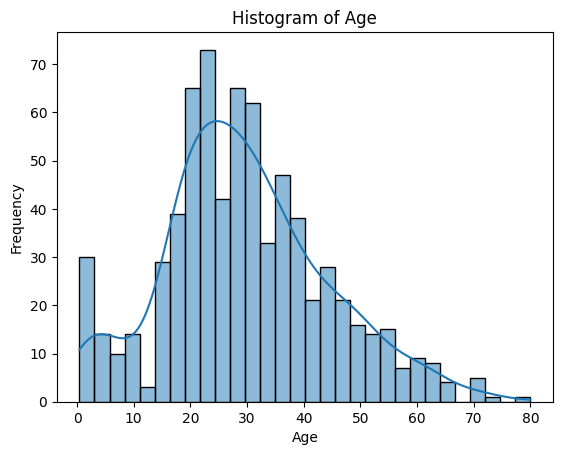

In [12]:
#Histogram shows how values are spread
#Boxplot helps you see outliers and spread

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Age
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

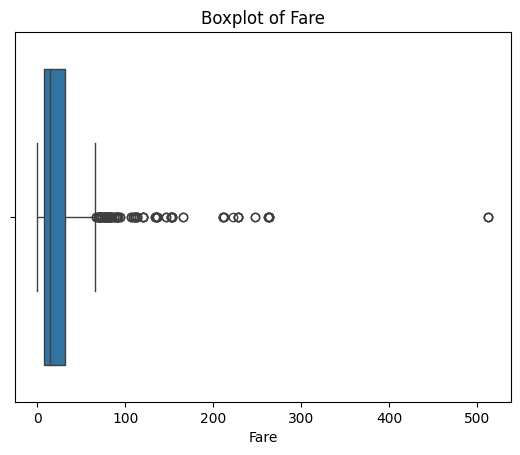

In [13]:
# Boxplot for Fare
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare")
plt.xlabel("Fare")
plt.show()

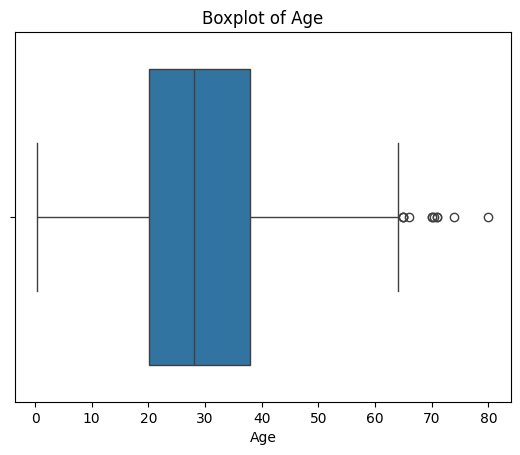

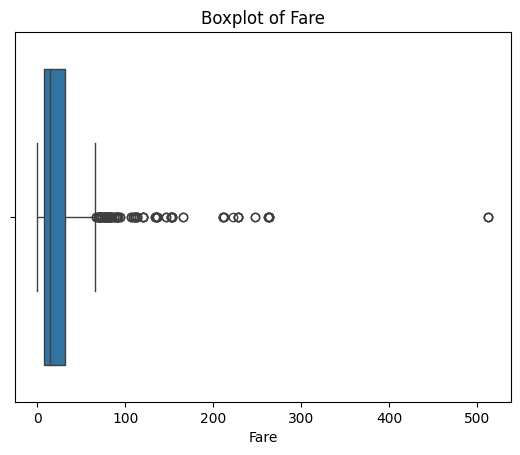

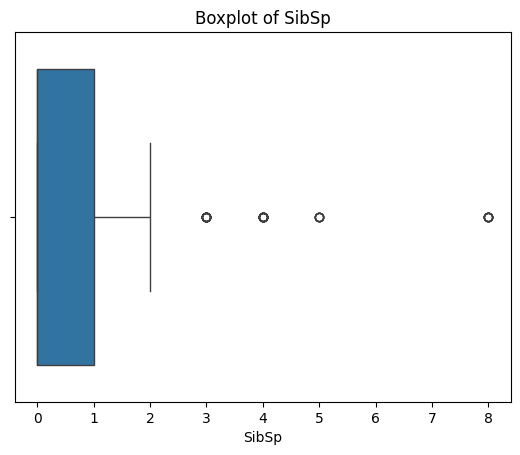

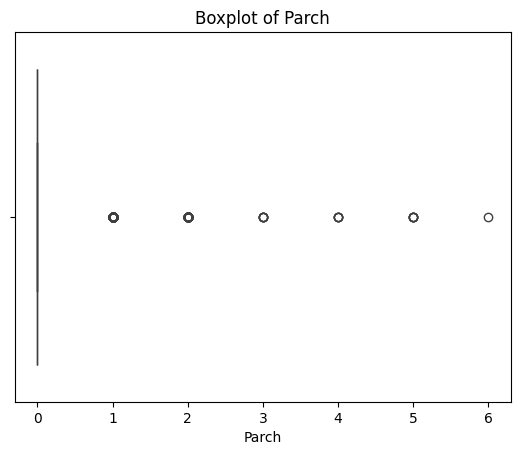

In [8]:
# Boxplot for all numeric columns (optional)
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### 3.Use Pairplot / Correlation Matrix for Feature Relationships

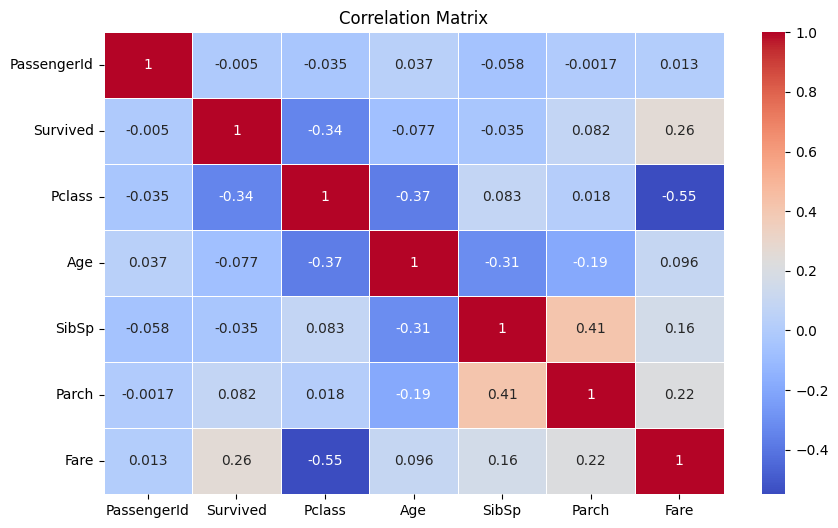

In [15]:
#Correlation Matrix: Tells how strongly two features are related numerically (−1 to +1)
#Pairplot: Plots relationships between each feature (good for small datasets)

# Keep only numeric columns
numeric_df = df.select_dtypes(include='number')

# Now generate correlation matrix only for numeric data
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

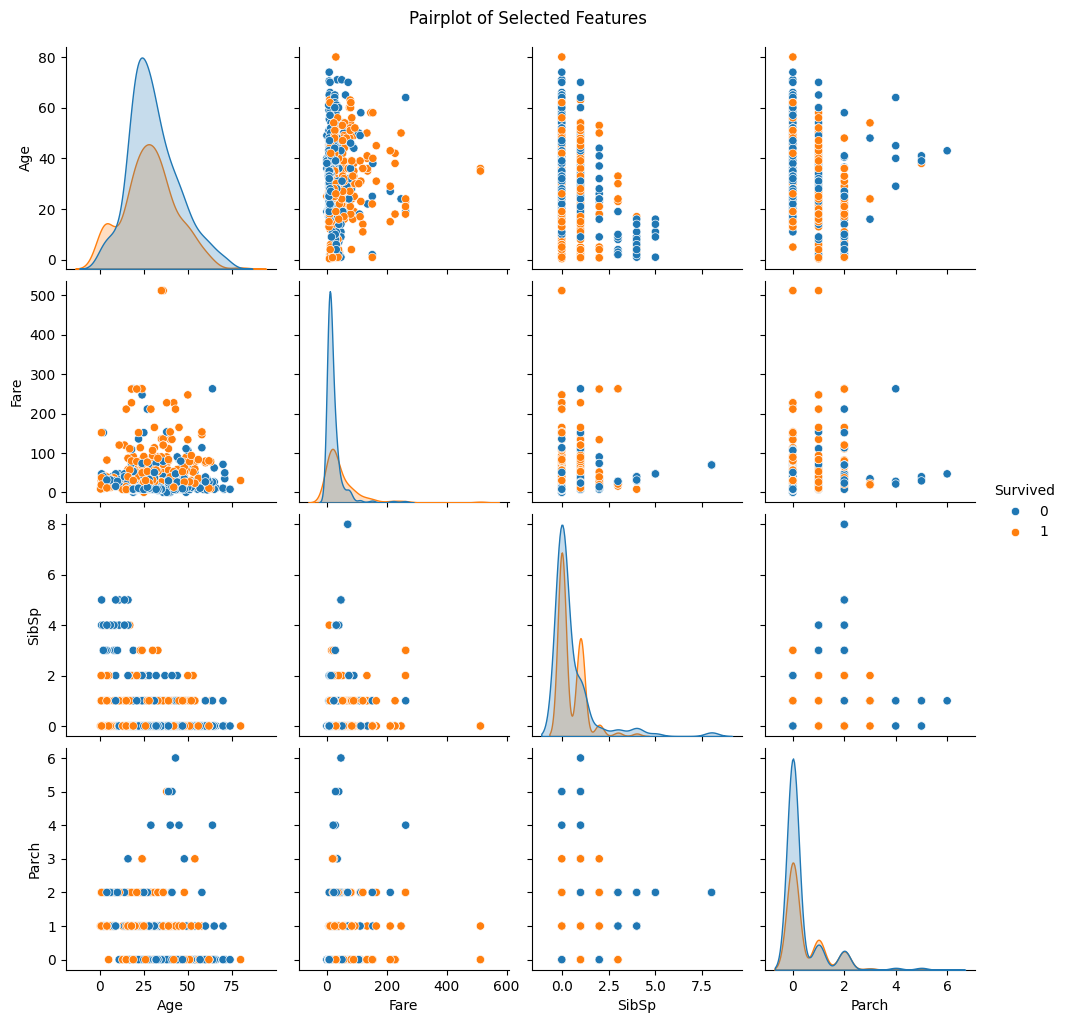

In [16]:
# Pairplot (show interactions and clusters based on 'Survived')
sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']], hue='Survived')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

### 4.Identify Patterns, Trends, or Anomalies in the data

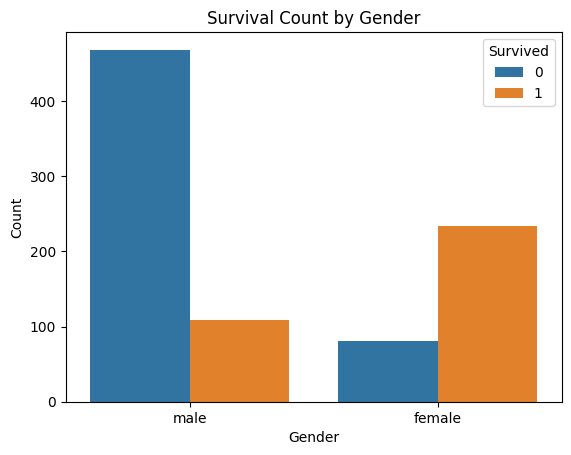

In [17]:
# Survival count by Gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

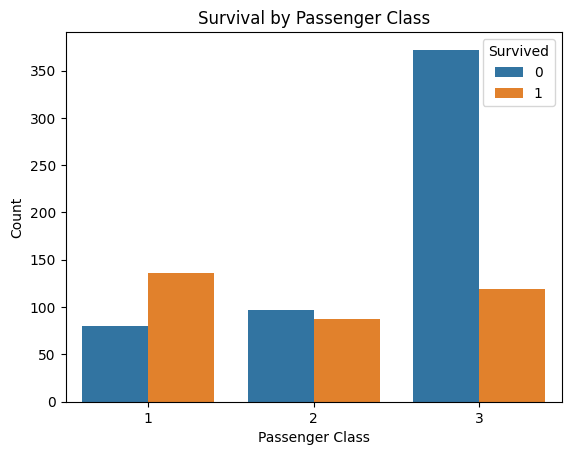

In [18]:
# Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

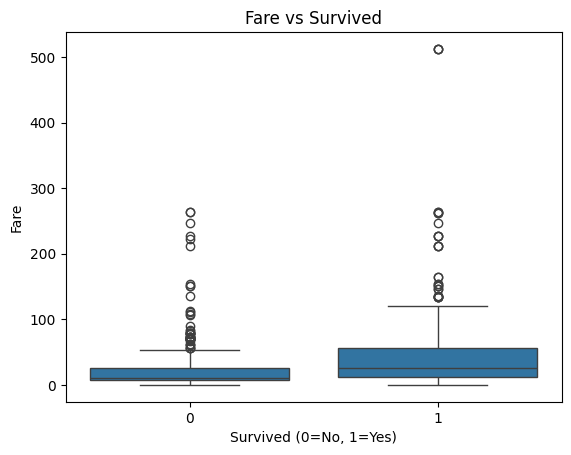

In [19]:
# Fare vs Survived (boxplot)
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survived")
plt.xlabel("Survived (0=No, 1=Yes)")
plt.ylabel("Fare")
plt.show()

In [20]:
# save the dataset
df.to_csv("/home/apiiit123/task1/cleaned_titanic.csv", index=False)

### 5.Basic feature-level inferences from visuals

In [ ]:
-Most females survived, while most males didn’t.
-1st class passengers had the highest survival rate.
-Higher fares are associated with higher survival chances.
-There are outliers in 'Fare' and 'Age' columns.
-'Age' is skewed slightly right; many passengers are between 20–40.